## 1 questao

Represente os dados adicionando bolhas (círculos) ao mapa. Cada tipo de infração deve ser representado
por uma cor, e o tamanho do círculo deve ser proporcional ao número de ocorrências no ponto geográfico.
Basta considerar as infrações com maior incidência.

In [1]:
library(data.table)

# para ler e processar arquvos grandes data.table é otimo
outubroReduzido <- fread("https://github.com/ferroao/janejupy/raw/main/source/Dados_infracoes_outubro_reduzido_2019_5.csv")
head(outubroReduzido[,4:11])
colnames(outubroReduzido)

tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_latitude,auinf_local_longitude,grav_tipo
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
AUTOMOVEL,01/10/2019,00:00:00,"DF-001 Km 60,3 Sent. Viad. Periquito/Rec. das Emas",NA,,,Média
CAMIONETA,01/10/2019,00:00:00,"DF-011(EPIG) KM 0,8 SENT. EPTG/EIXO MONUMENTAL (PROX. PASS. OCTOGONAL)",NA,,,Média
AUTOMOVEL,01/10/2019,00:01:00,"DF-011(EPIG) KM 0,8 SENT. EPTG/EIXO MONUMENTAL (PROX. PASS. OCTOGONAL)",NA,,,Grave
CAMINHAO,01/10/2019,00:07:00,"DF-003 (EPIA) KM 32,5 SENTIDO NORTE",NA,,,Média
AUTOMOVEL,01/10/2019,00:08:00,"DF-001(EPCT)Km 57,6 Sent. Rec. das Emas/Viaduto do Periquito",NA,,,Média
CAMINHAO,01/10/2019,00:09:00,DF-003(EPIA) KM 29 SENTIDO NORTE,NA,,,Média


[1] "tipo_infracao"         "descricao"             "tipo_infrator"        
 [4] "tipo_veiculo"          "cometimento"           "hora_cometimento"     
 [7] "auinf_local_rodovia"   "auinf_local_km"        "auinf_local_latitude" 
[10] "auinf_local_longitude" "grav_tipo"

colunas

In [2]:
colnames(outubroReduzido)

[1] "tipo_infracao"         "descricao"             "tipo_infrator"        
 [4] "tipo_veiculo"          "cometimento"           "hora_cometimento"     
 [7] "auinf_local_rodovia"   "auinf_local_km"        "auinf_local_latitude" 
[10] "auinf_local_longitude" "grav_tipo"

estrutura

In [3]:
str(outubroReduzido)

Classes ‘data.table’ and 'data.frame':	63415 obs. of  11 variables:
 $ tipo_infracao        : chr  "7455-0" "7455-0" "7463-0" "7455-0" ...
 $ descricao            : chr  "Transitar em velocidade superior à máxima permitida em até 20%" "Transitar em velocidade superior à máxima permitida em até 20%" "Transitar em velocidade superior à máxima permitida em mais de 20% até 50%" "Transitar em velocidade superior à máxima permitida em até 20%" ...
 $ tipo_infrator        : chr  "Condutor" "Condutor" "Condutor" "Condutor" ...
 $ tipo_veiculo         : chr  "AUTOMOVEL" "CAMIONETA" "AUTOMOVEL" "CAMINHAO" ...
 $ cometimento          : chr  "01/10/2019" "01/10/2019" "01/10/2019" "01/10/2019" ...
 $ hora_cometimento     : chr  "00:00:00" "00:00:00" "00:01:00" "00:07:00" ...
 $ auinf_local_rodovia  : chr  "DF-001 Km 60,3 Sent. Viad. Periquito/Rec. das Emas" "DF-011(EPIG) KM 0,8 SENT. EPTG/EIXO MONUMENTAL (PROX. PASS. OCTOGONAL)" "DF-011(EPIG) KM 0,8 SENT. EPTG/EIXO MONUMENTAL (PROX. PASS. OCTOGONAL

### tipos de infração:

In [4]:
head(unique(outubroReduzido$tipo_infracao) )

[1] "7455-0" "7463-0" "7471-0" "6050-3" "5681-0" "5819-7"

### Vamos remover linhas com tipo_infracao == ""

In [5]:
outubroReduzido2 <- outubroReduzido[-which(outubroReduzido$tipo_infracao=="")]
dim(outubroReduzido)
dim(outubroReduzido2)

[1] 63415    11

[1] 63209    11

### manter linhas com latitude conhecida:

In [6]:
# latitude == ""
nrow(outubroReduzido2[which(outubroReduzido2$auinf_local_latitude=="" ),] )

# latitude == 0
nrow(outubroReduzido2[which(outubroReduzido2$auinf_local_latitude==0 ),] )

[1] 7171

[1] 46571

In [7]:
# latitude == 0 ou ""
nrow(outubroReduzido2[which(outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,] )

nrow(outubroReduzido2[which(!outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,] )

nrow(outubroReduzido2[-which(outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,] )

# latitude conhecida
outubroReduzido3 <- outubroReduzido2[-which(outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,]
dim(outubroReduzido3)

[1] 53742

[1] 9467

[1] 9467

[1] 9467   11

### vamos remover locais sem nome

In [8]:
semNomedeLocal <- which(outubroReduzido3$auinf_local_rodovia=="")

outubroReduzido3 <- outubroReduzido3[-semNomedeLocal]# atencao ao -
dim(outubroReduzido3)

[1] 9412   11

### temos que contar quantas ocorrencias de cada tipo ocorrem em cada punto

quantos nomes de local temos?

In [9]:
head(unique(outubroReduzido3$auinf_local_rodovia) )

length(unique(outubroReduzido3$auinf_local_rodovia) )

[1] "DF 180"      "DF 095"      "DF 001"      "DF 0075"     "DF 085"     
[6] "DF 085 EPTG"

[1] 317

é necessario criar nomes de local combinando rodovia e km

1ro é necessário remover NAs da coluna auinf_local_km

In [10]:
outubroReduzido3$auinf_local_km <- ifelse(is.na(outubroReduzido3$auinf_local_km)
                                        # caso seja NA colocar ""
                                        ,""
                                        # caso nao seja NA
                                        ,outubroReduzido3$auinf_local_km
)

outubroReduzido3$localCombi <- ifelse(
       # avaliar se há presenca de km
       grepl("KM|km",outubroReduzido3$auinf_local_rodovia)
       # se presenta a string km nao modificar
       ,outubroReduzido3$auinf_local_rodovia
       # caso contrario adicionar-la juntando a coluna rodovia + km
       ,paste0(outubroReduzido3$auinf_local_rodovia,
               " KM "
               ,outubroReduzido3$auinf_local_km
              )
       )
head(unique(outubroReduzido3$localCombi))

[1] "DF 180 KM 9"  "DF 095 KM 8"  "DF 095 KM 7"  "DF 001 KM 79" "DF 001 KM 77"
[6] "DF 0075 KM 5"

### corrigir nomes de local

as vezes df esta em minuscula

In [11]:
outubroReduzido3$localCombi<-gsub("df","DF",outubroReduzido3$localCombi)

# excesso de espacos
outubroReduzido3$localCombi<-gsub("\\s+"," ",outubroReduzido3$localCombi)

# as vezes - separam DF do numero DF-000
outubroReduzido3$localCombi<-gsub("-"," ",outubroReduzido3$localCombi)

# as vezes DF e numero estao colados DF000, separa-los
outubroReduzido3$localCombi<-gsub("(DF)([0-9]+)","\\1 \\2",outubroReduzido3$localCombi)

# quantos locais da nova coluna rodvia + km
length(unique(outubroReduzido3$localCombi) )

[1] 504

### para cada localCombi (rodovia + km) contar quantas infracoes por tipo de infrac.

In [12]:
smallDT<-data.table(localCombi=c(rep("first",5)
                    ,rep("second",2)
                    ,rep("third",2)
                    )
                    ,infracao = c(rep(c(1,2,3),3) )
         )
smallDT


localCombi,infracao
<chr>,<dbl>
first,1
first,2
first,3
first,1
first,2
second,3
second,1
third,2
third,3


In [13]:

smallDT[, .(count = .N), by = list(localCombi,infracao) ]

localCombi,infracao,count
<chr>,<dbl>,<int>
first,1,2
first,2,2
first,3,1
second,3,1
second,1,1
third,2,1
third,3,1


In [14]:
colnames(outubroReduzido3)

infraPerLocal <- outubroReduzido3[, .(count = .N), by = list(localCombi,tipo_infracao) ]
head(infraPerLocal)

[1] "tipo_infracao"         "descricao"             "tipo_infrator"        
 [4] "tipo_veiculo"          "cometimento"           "hora_cometimento"     
 [7] "auinf_local_rodovia"   "auinf_local_km"        "auinf_local_latitude" 
[10] "auinf_local_longitude" "grav_tipo"             "localCombi"

localCombi,tipo_infracao,count
<chr>,<chr>,<int>
DF 180 KM 9,5193-0,1
DF 095 KM 8,6769-0,346
DF 095 KM 8,7315-0,11
DF 095 KM 7,6599-2,1
DF 001 KM 79,6050-1,2
DF 001 KM 77,5819-6,194


### quais sao as coordenadas desses locais

já sabemos que cada local vai ter mais de uma coordenada

In [15]:
head(outubroReduzido3[which(outubroReduzido3$localCombi %in% "DF 095 KM 8"),][,c("auinf_local_latitude",  "auinf_local_longitude")] )

auinf_local_latitude,auinf_local_longitude
<chr>,<chr>
"-15,79449158","-48,19938649"
"-15,79449158","-48,19938649"
"-15,79055229","-48,10702933"
"-15,79093796","-48,04490652"
"-15,79093796","-48,04490652"
"-15,79093796","-48,04490652"


### para cada um dos locais vamos pegar a mediana de lat e de long

In [16]:
smallDT2<-data.table(localCombi=c(rep("first",5)
                                 ,rep("second",2)
                                 ,rep("third",2) )
                    ,lat = c(rep(1,2),rep(1.5,3),rep(2,2),rep(1,2) )
                    ,long = c(rep(4,5),rep(2,2),rep(1,2) )
)
smallDT2



localCombi,lat,long
<chr>,<dbl>,<dbl>
first,1.0,4
first,1.0,4
first,1.5,4
first,1.5,4
first,1.5,4
second,2.0,2
second,2.0,2
third,1.0,1
third,1.0,1


In [17]:
smallDT2[, .(latM=median(lat), lonM=median(long) ), by = localCombi ]

localCombi,latM,lonM
<chr>,<dbl>,<dbl>
first,1.5,4
second,2.0,2
third,1.0,1


### vamos converter a numerico

In [18]:
str(outubroReduzido3$auinf_local_latitude)

# no meu sistema tenho que trocar , por .
outubroReduzido3$auinf_local_latitude<-gsub("," , ".",outubroReduzido3$auinf_local_latitude)
outubroReduzido3$auinf_local_latitude<-as.numeric(outubroReduzido3$auinf_local_latitude)

outubroReduzido3$auinf_local_longitude<-gsub(",",".",outubroReduzido3$auinf_local_longitude)
outubroReduzido3$auinf_local_longitude<-as.numeric(outubroReduzido3$auinf_local_longitude)

 chr [1:9412] "-15,75970971" "-15,79449158" "-15,79449158" "-15,79055229" ...


In [19]:
coordePorLocal <-outubroReduzido3[, .(latM=median(auinf_local_latitude), lonM=median(auinf_local_longitude) )
                 , by = localCombi ]

### agora temos que juntar as duas tabelas

In [20]:
#match criando colunas novas: os nomes dos data.tables sao intercalados
                                          # coluna em comum localCombi
infraPerLocal$latM <- coordePorLocal$latM[match(infraPerLocal$localCombi,
                                              coordePorLocal$localCombi)]

infraPerLocal$lonM <- coordePorLocal$lonM[match(infraPerLocal$localCombi,
                                              coordePorLocal$localCombi)]
head(infraPerLocal)

localCombi,tipo_infracao,count,latM,lonM
<chr>,<chr>,<int>,<dbl>,<dbl>
DF 180 KM 9,5193-0,1,-15.78821,-48.21257
DF 095 KM 8,6769-0,346,-15.78852,-48.01603
DF 095 KM 8,7315-0,11,-15.78852,-48.01603
DF 095 KM 7,6599-2,1,-15.78851,-48.01601
DF 001 KM 79,6050-1,2,-15.82377,-48.05556
DF 001 KM 77,5819-6,194,-15.78839,-48.01611


### ordenar por incidencia

In [21]:
head(infraPerLocal[order(count, decreasing = TRUE)] )

localCombi,tipo_infracao,count,latM,lonM
<chr>,<chr>,<int>,<dbl>,<dbl>
DF 095 KM 8,6769-0,346,-15.78852,-48.01603
DF 001 KM 69,6769-0,288,-15.87611,-48.04854
DF 001 KM 77,5819-6,194,-15.78839,-48.01611
DF 001 KM 69,5681-0,167,-15.87611,-48.04854
DF 085 KM 1,7633-2,150,-15.80888,-47.95712
DF 128 KM 3,6769-0,140,-15.52834,-47.62253


In [22]:
infraPerLocalOr <- infraPerLocal[order(count, decreasing = TRUE)]
head(infraPerLocalOr)

localCombi,tipo_infracao,count,latM,lonM
<chr>,<chr>,<int>,<dbl>,<dbl>
DF 095 KM 8,6769-0,346,-15.78852,-48.01603
DF 001 KM 69,6769-0,288,-15.87611,-48.04854
DF 001 KM 77,5819-6,194,-15.78839,-48.01611
DF 001 KM 69,5681-0,167,-15.87611,-48.04854
DF 085 KM 1,7633-2,150,-15.80888,-47.95712
DF 128 KM 3,6769-0,140,-15.52834,-47.62253


### vamos pegar locais+infracao (coluna count) as maiores a 10 ocorrencias

In [23]:
infraPerLocalOr10 <- infraPerLocalOr[which(count>=10)]
head(infraPerLocalOr10)

localCombi,tipo_infracao,count,latM,lonM
<chr>,<chr>,<int>,<dbl>,<dbl>
DF 095 KM 8,6769-0,346,-15.78852,-48.01603
DF 001 KM 69,6769-0,288,-15.87611,-48.04854
DF 001 KM 77,5819-6,194,-15.78839,-48.01611
DF 001 KM 69,5681-0,167,-15.87611,-48.04854
DF 085 KM 1,7633-2,150,-15.80888,-47.95712
DF 128 KM 3,6769-0,140,-15.52834,-47.62253


### tipos de infracao mais frequentes

In [24]:
head(infraPerLocalOr10[, .(count = .N), by = tipo_infracao ])

tipo_infracao,count
<chr>,<int>
6769-0,19
5819-6,3
5681-0,7
7633-2,16
5690-0,2
5843-4,8


In [25]:
head(infraPerLocalOr10[, .(count = .N), by = tipo_infracao ][order(-count)] )


tipo_infracao,count
<chr>,<int>
7633-1,20
6769-0,19
7633-2,16
5185-1,15
5843-4,8
7579-0,8


In [26]:
head(infraPerLocalOr10[, .(count = .N), by = tipo_infracao ][order(-count)][1:11])


tipo_infracao,count
<chr>,<int>
7633-1,20
6769-0,19
7633-2,16
5185-1,15
5843-4,8
7579-0,8


In [27]:
infraSel <- infraPerLocalOr10[, .(count = .N), by = tipo_infracao ][order(-count)][1:11]$tipo_infracao

infraSel

[1] "7633-1" "6769-0" "7633-2" "5185-1" "5843-4" "7579-0" "5681-0" "7366-2"
 [9] "6068-1" "5185-2" "5169-1"

In [28]:
infraPerLocalOr10Sel <- infraPerLocalOr10[which(infraPerLocalOr10$tipo_infracao %in% infraSel)]
head(infraPerLocalOr10Sel)

localCombi,tipo_infracao,count,latM,lonM
<chr>,<chr>,<int>,<dbl>,<dbl>
DF 095 KM 8,6769-0,346,-15.78852,-48.01603
DF 001 KM 69,6769-0,288,-15.87611,-48.04854
DF 001 KM 69,5681-0,167,-15.87611,-48.04854
DF 085 KM 1,7633-2,150,-15.80888,-47.95712
DF 128 KM 3,6769-0,140,-15.52834,-47.62253
DF 095 KM 8,5843-4,123,-15.78852,-48.01603


### usando leaflet

In [29]:
if (system.file(package = "leaflet") == '') {
              install.packages("leaflet")
}

# install.packages("leaflet")
library(leaflet)

colnames(infraPerLocalOr10Sel)

# definir colores para infracoes
mycolors <- colorFactor(palette = c('forestgreen', 'red2', 'orange', 'cornflowerblue', 
                                   'magenta', 'darkolivegreen4', 'indianred1', 'tan4', 'darkblue', 
                                   'wheat4','firebrick4')
                       , unique(infraPerLocalOr10Sel$tipo_infracao)
                       )

[1] "localCombi"    "tipo_infracao" "count"         "latM"         
[5] "lonM"

In [30]:
#install.packages("webshot")
if (system.file(package = "webshot") == '') {
              install.packages("webshot")
              webshot::install_phantomjs()
}
library(webshot)


In [31]:
library(htmlwidgets)
library(IRdisplay)
library(leaflet)


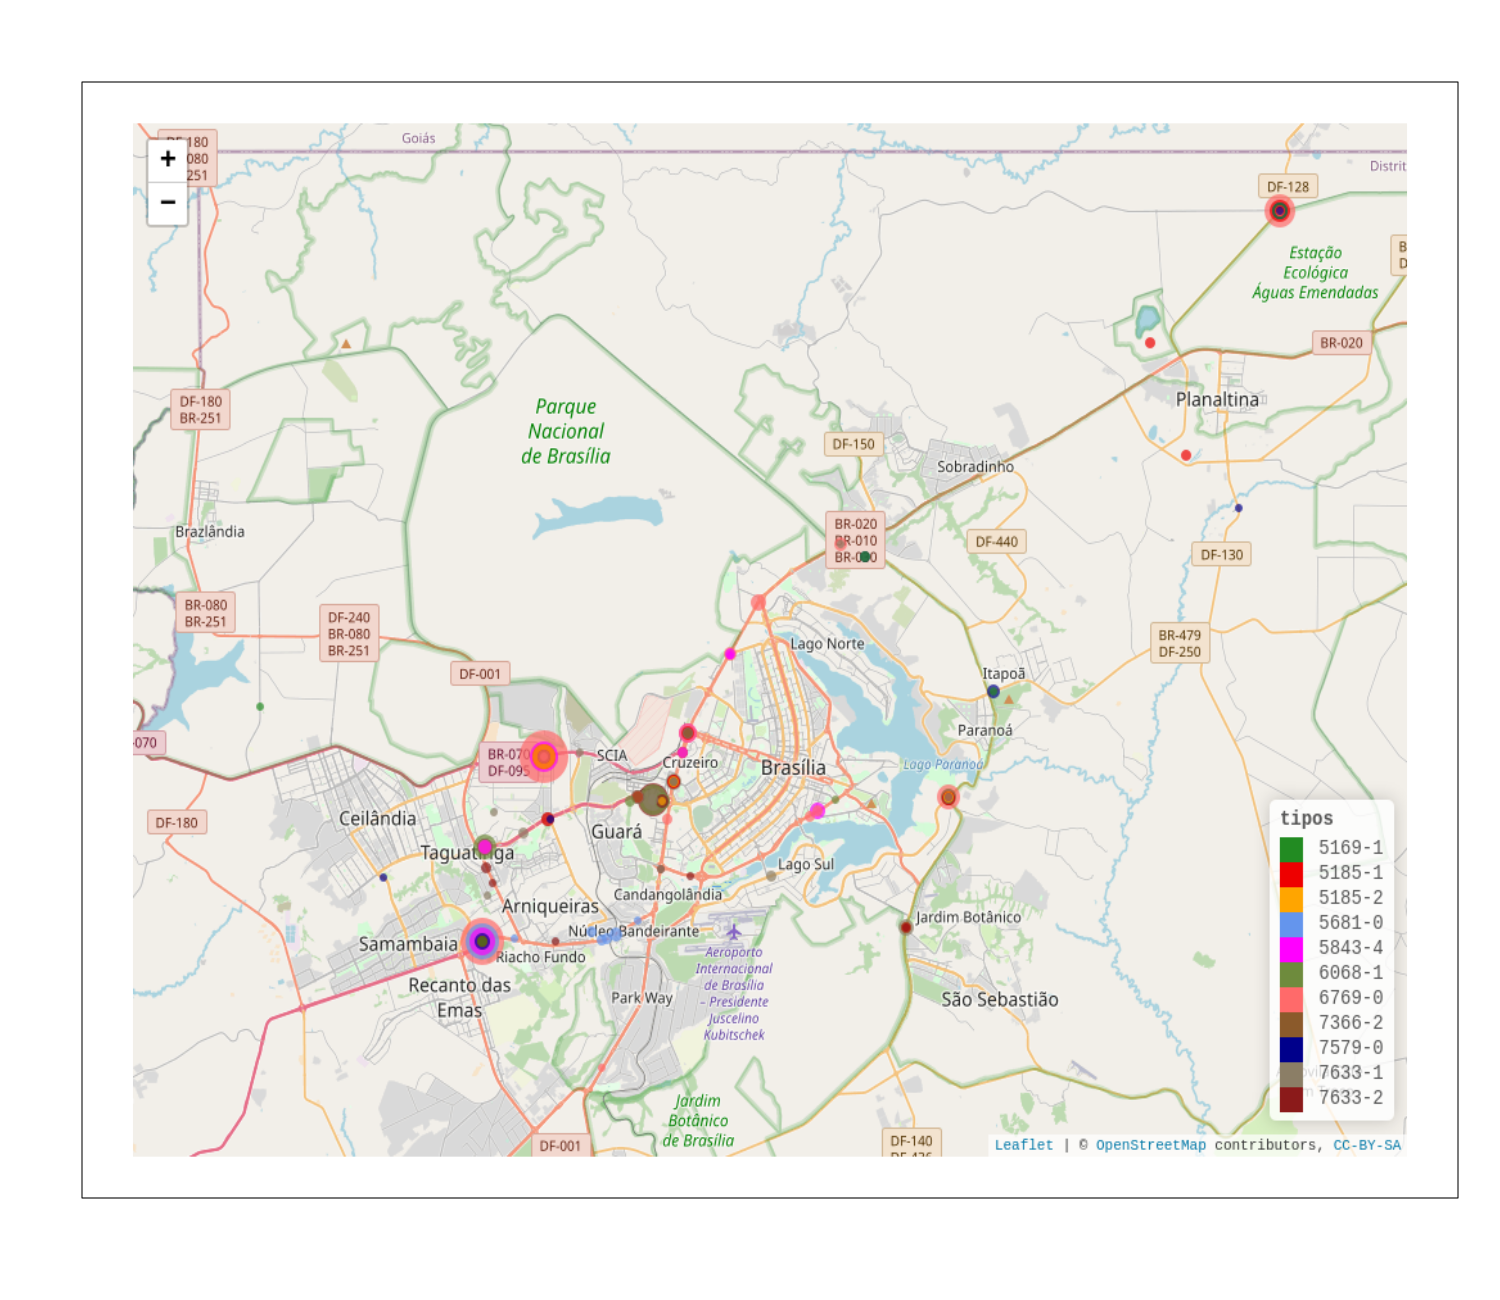

In [32]:
m = leaflet(data = infraPerLocalOr10Sel) %>% addTiles() %>%
addCircleMarkers(~lonM, ~latM,
  radius = ~ sqrt(count),
  fillColor = ~mycolors(tipo_infracao),
  label = ~as.character(localCombi)
  , stroke = FALSE
  , fillOpacity = 0.7
) %>% addLegend('bottomright', 
          pal = mycolors, 
          values = ~tipo_infracao,
          title = 'tipos',
          opacity = 1)


saveWidget(m, 'demo.html', selfcontained = TRUE)

webshot("demo.html", file = "Rplot.png")
library(png)
img <- readPNG("Rplot.png")
options(repr.plot.width = 15, repr.plot.height = 13, repr.plot.res = 100)
plot(NA, xlim = c(0, 7), ylim = c(0, 7), type = "n", xaxt = "n", yaxt = "n", xlab = "", ylab = "")
rasterImage(img, 0, 0, 7, 7)